In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as signal
from vlfpy import *
mpl.rcParams['mathtext.default'] = 'regular'

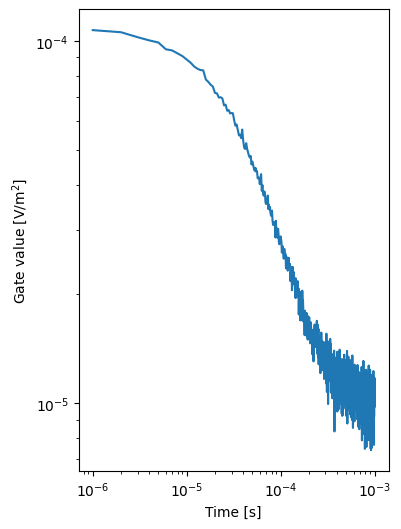

In [364]:
t = np.linspace(1e-6, 1e-3, 1000)

shift = 0.0001
x = 1e-14*((t+shift)**(-5/2)) + 1e-5*np.exp(-1*(t))
x = x + np.random.normal(0, 1e-6, len(t))

plt.figure(figsize=(4, 6))
plt.xlabel('Time [s]') 
plt.ylabel('Gate value [$V/m^2$]')

plt.loglog(t, x)

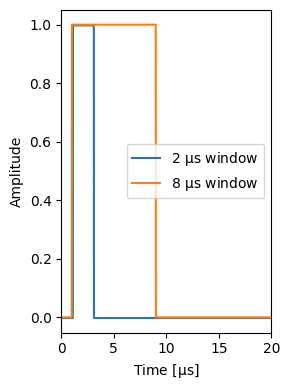

In [14]:
# boxcar
resolution = 1e6

interval = int(resolution/100)
t = np.linspace(0, 100e-6, int(resolution))
small =  np.zeros_like(t)
small[interval:interval*3] = 1
large =  np.zeros_like(t)
large[interval:interval*9] = 1

plt.figure(figsize=(3, 4))
plt.xlabel('Time [$\mu s$]')
plt.ylabel('Amplitude')
plt.plot(t/1e-6, np.roll(small, 1000)-0.0025, label='2 $\mu s$ window')
plt.plot(t/1e-6, large, label='8 $\mu s$ window')
plt.legend()
plt.xlim(0, 20)
plt.tight_layout()
plt.savefig('figures/introduction/windows.pdf')

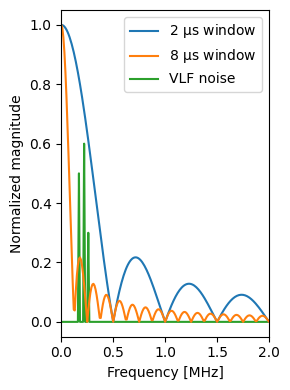

In [13]:

fft_small = np.fft.fft(small)
fft_large = np.fft.fft(large)
freq = np.fft.fftfreq(len(t), t[1]-t[0])

# remove negative frequencies
fft_small = fft_small[:len(fft_small)//2]
fft_large = fft_large[:len(fft_large)//2]
freq = freq[:len(freq)//2]

# normalize
fft_small = fft_small/np.max(np.abs(fft_small))
fft_large = fft_large/np.max(np.abs(fft_large))


# add vlf noise
vlf = np.zeros_like(fft_small)
vlf[17] = 0.5
vlf[26] = 0.3
vlf[22] = 0.6




plt.figure(figsize=(3, 4))
plt.xlabel('Frequency [MHz]')
plt.ylabel('Normalized magnitude')

plt.plot(freq/1e6, np.abs(fft_small), label='2 $\mu s$ window')
plt.plot(freq/1e6, np.abs(fft_large), label='8 $\mu s$ window')
plt.plot(freq/1e6, np.abs(vlf), label='VLF noise', zorder=-1)


plt.xlim(0, 2)
plt.legend()
plt.tight_layout()
plt.savefig('figures/introduction/windows_fft.pdf')

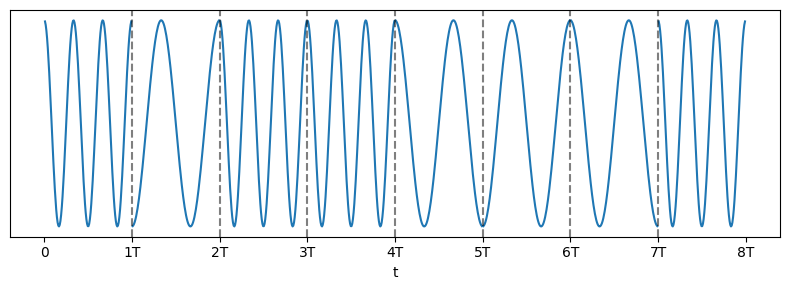

In [7]:
# fsk
fs = 1000
t = np.linspace(0, 1, fs+1)
fc = 18
delta_f = 6
data = np.array([1, 0, 1, 1, 0, 0, 0, 1])
T = 1/len(data)
# change 0 to -1
data = 2*data - 1
fsk = np.zeros_like(t)
for i in range(len(data)):
    t1 = i*int(T*fs)
    t2 = (i+1)*int(T*fs)
    
    fsk[t1:t2] = np.cos(2*np.pi*(fc+data[i]*delta_f)*t[t1:t2])
    fsk[t1] = np.nan
    fsk[t2] = np.nan
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(t/T, fsk, )
ax.set_xlabel('t')
ax.yaxis.set_major_locator(plt.NullLocator())

for i in range(1, int(len(data))):
    plt.axvline(x=i*T*8, color='black', linestyle='--', alpha=0.5)

ax.set_xticks(np.linspace(0,8,9))
x_ticks = ['0', '1T', '2T', '3T', '4T', '5T', '6T', '7T', '8T']
ax.set_xticklabels(x_ticks)
plt.tight_layout()
plt.savefig('figures/theory/fsk.pdf')


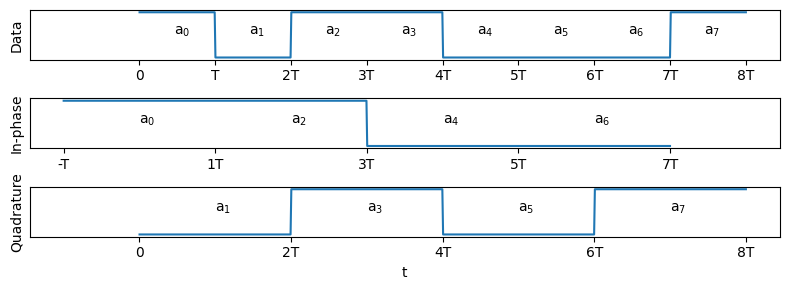

In [29]:
data = np.array([1, 0, 1, 1, 0, 0, 0, 1])

T = 0.1
#fc = 10
fs = 1000
t = np.linspace(-T, len(data)*T, int(fs*(len(data)+1)*T))

fig, axs = plt.subplots(3, 1, figsize=(8, 3))

#make 0 to -1
#data = 2*data - 1



data_inphase = data[::2]
data_quadrature = data[1::2]
data_inphase = np.repeat(data_inphase, 2)
data_quadrature = np.repeat(data_quadrature, 2)

data_plot = np.zeros_like(t)
inphase = np.zeros_like(t)
quadrature = np.zeros_like(t)
for n in range(len(data)):
    t1 = int(n*T*fs)
    t2 = int((n+1)*T*fs)

    data_plot[t1+int(T*fs):t2+int(T*fs)] = data[n]
    inphase[t1:t2] = data_inphase[n]
    quadrature[t1+int(T*fs):t2+int(T*fs)] = data_quadrature[n]

data_plot[1:100] = np.nan
inphase[800:899] = np.nan
quadrature[1:100] = np.nan

axs[0].plot(t/T, data_plot)
x_ticks = ['0', 'T', '2T', '3T', '4T', '5T', '6T', '7T', '8T']
axs[0].set_xticks(np.linspace(0, 8, 9))
axs[0].set_xticklabels(x_ticks)
axs[0].set_ylabel('Data')


#for i in range(1, int(len(data))):
#    axs[0].axvline(x=i*T*10, color='black', linestyle='--')
for i in range(len(data)):
    axs[0].text(i*T*10+0.45,0.5, "$a_"+str(i)+"$")
#axs[0].set_title('Data')


axs[1].plot(t/T, inphase)
x_ticks = ['-T', '1T', '3T', '5T', '7T']
axs[1].set_xticks(np.linspace(-1, 7, 5))
axs[1].set_xticklabels(x_ticks)
axs[1].set_ylabel('In-phase')

for i in range(len(data)//2):
    axs[1].text(2*i*T*10,0.5, "$a_{"+str(i*2)+"}$")
    

axs[2].plot(t/T, quadrature)
x_ticks = ['0', '2T', '4T', '6T', '8T']
axs[2].set_xticks(np.linspace(0, 8, 5))
axs[2].set_xticklabels(x_ticks)
axs[2].set_ylabel('Quadrature')

for i in range(len(data)//2):
    axs[2].text(2*i*T*10+1,0.5, "$a_{"+str(i*2+1)+"}$")

plt.xlabel('t')

axs[0].yaxis.set_major_locator(plt.NullLocator())
axs[1].yaxis.set_major_locator(plt.NullLocator())
axs[2].yaxis.set_major_locator(plt.NullLocator())

plt.tight_layout()
plt.savefig('figures/theory/bits oqpsk.pdf')

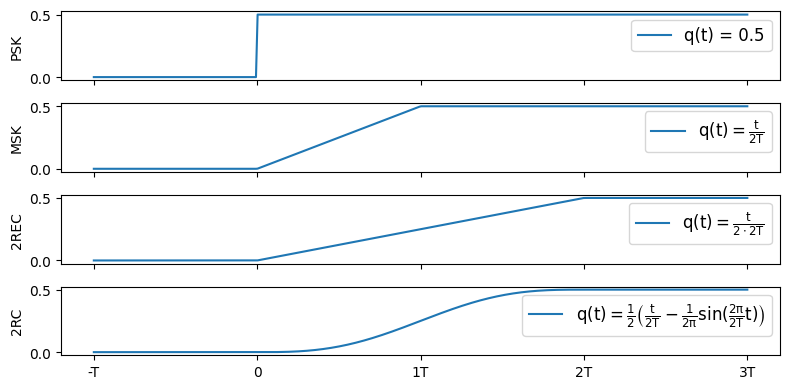

In [48]:

T = 0.1
fs = 1000
length = 3
t = np.linspace(-T, length*T, int(fs*(length+1)*T))
psk = np.zeros_like(t)
psk[int(T*fs):] = 1/2

cpfsk = np.zeros_like(t)

cpfsk[int(T*fs):int(2*T*fs)] = 1/(2*T)*t[int(T*fs):int(2*T*fs)]
cpfsk[int(2*T*fs):] = 1/2

rec = np.zeros_like(t)
L = 2
rec[int(T*fs):int(3*T*fs)] = 1/(2*L*T)*t[int(T*fs):int(3*T*fs)]
rec[int(3*T*fs):] = 1/2


rc = np.zeros_like(t)
L = 2
rc[int(T*fs):int(3*T*fs)] = 1/2*(t[int(T*fs):int(3*T*fs)]/(L*T)-1/(2*np.pi)*np.sin(2*np.pi/(L*T)*t[int(T*fs):int(3*T*fs)]))
rc[int(3*T*fs):] = 1/2 

fig, axs = plt.subplots(4, 1, figsize=(8, 4), sharex=True)
axs[0].plot(t/T, psk, label='q(t) = 0.5')
axs[0].set_ylabel('PSK')
axs[0].legend(fontsize=12)

axs[1].plot(t/T, cpfsk, label=r'$q(t) = \frac{t}{2T}$')
axs[1].set_ylabel('MSK')
axs[1].legend(fontsize=12)

axs[2].plot(t/T, rec, label=r'$q(t) = \frac{t}{2\cdot2T}$')
axs[2].set_ylabel('2REC')
axs[2].legend(fontsize=12)

axs[3].plot(t/T, rc, label=r'$q(t) = \frac{1}{2}\left(\frac{t}{2T}-\frac{1}{2\pi}sin(\frac{2π}{2T}t)\right)$')
axs[3].set_ylabel('2RC')
axs[3].legend(fontsize=12)


x_ticks = ['-T', 0 , '1T', '2T', '3T']
for i in range(4):
    axs[i].set_xticks(np.linspace(-1, 3, 5))
    axs[i].set_xticklabels(x_ticks)

plt.tight_layout()
plt.savefig('figures/theory/phase_response.pdf')


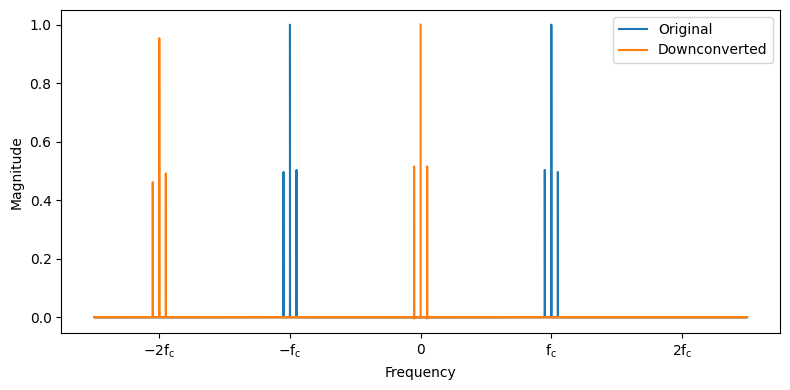

In [30]:
fs = 1e5
t = np.linspace(0, 2, int(fs*2))
fc = 20e3
delta_f = 1e3
f1 = fc + delta_f
f2 = fc - delta_f

x = np.cos(2*np.pi*fc*t) + 1/2*np.cos(2*np.pi*f1*t) + 1/2*np.cos(2*np.pi*f2*t)

fft = np.abs(np.fft.fft(x))
freq = np.fft.fftfreq(len(x), 1/(fs))
#fft = fft[:len(fft)//2]
#freq = freq[:len(freq)//2]


fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(freq/1e3, fft/np.max(fft), label='Original')

#x_down = x * np.cos(-2*np.pi*fc*t)
x_down = x * np.exp(-1j*2*np.pi*fc*t)

fft_down = np.abs(np.fft.fft(x_down))
fft_down = np.fft.fft(x_down).real + np.abs(1j*np.fft.fft(x_down).imag)
#fft_down = fft_down[:len(fft_down)//2]

fft_down = fft_down/np.max(fft_down)
#fft_down[0] = 0
ax.plot(freq/1e3, fft_down, label='Downconverted')

ax.set_xticks([-40,-20, 0, 20, 40])
ax.set_xticklabels(['$-2f_c$', '$-f_c$' ,'0','$f_c$', '$2f_c$'])
ax.set_xlabel('Frequency')
ax.set_ylabel('Magnitude')
plt.tight_layout()
plt.legend()

plt.savefig('figures/theory/downconversion.pdf')



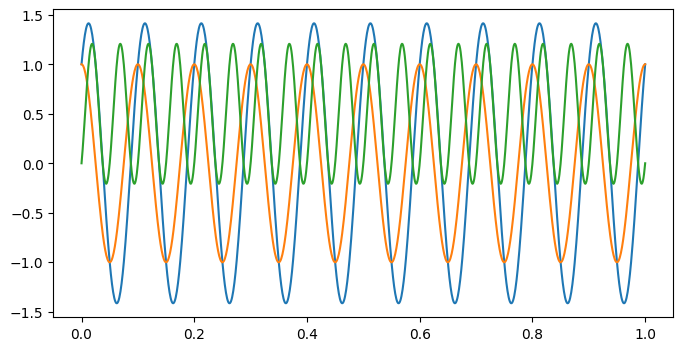

In [191]:
t = np.linspace(0, 1, 1000)

x = np.sin(2*np.pi*10*t) + np.cos(2*np.pi*10*t)

plt.figure(figsize=(8, 4))
plt.plot(t, x)
plt.plot(t, np.cos(2*np.pi*10*t))
plt.plot(t, x*np.sin(2*np.pi*10*t))

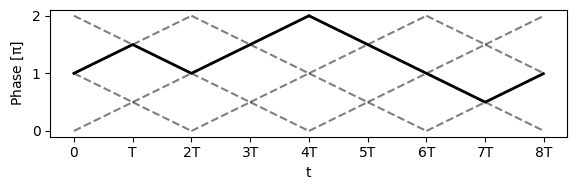

In [4]:
data = np.array([1,1,0,1,0,0])
#data = np.array([1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0])
data = np.array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0])
data = np.array([1, 0, 1, 1, 0, 0, 0, 1])
T = 0.1
fc = 1/T*1.25
#fc = 10
fs = 1000
s, t, phase = generate_msk_data(data, T, fc, fs)

fig, ax = plt.subplots(figsize=(6, 2))


for j in range(4):
    t1 = int(2*j*T*fs)
    t2 = int((2*j+1)*T*fs)
    ax.plot(t[t1:t2]/T, (np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)
    ax.plot(t[t1:t2]/T, (np.pi+np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)

    ax.plot(t[t1:t2]/T, (2*np.pi-np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)
    ax.plot(t[t1:t2]/T, (np.pi-np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)

    t1 = int((2*j+1)*T*fs)
    t2 = int((2*j+2)*T*fs)

    ax.plot(t[t1:t2]/T, (0.5*np.pi + np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)
    ax.plot(t[t1:t2]/T, (1.5*np.pi+np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)

    ax.plot(t[t1:t2]/T, (1.5*np.pi-np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)
    ax.plot(t[t1:t2]/T, (0.5*np.pi-np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)



        





data = np.array([1, 0, 1, 1, 0, 0, 0, 1])
s, t, phase = generate_msk_data(data, T, fc, fs)
phase += np.pi
phase = phase % (2*np.pi)
phase[phase < 2e-2] = np.nan

ax.plot(t/T, phase/np.pi, color='black', linewidth=2)
#for i in range(1, int(len(data))):
#    ax.axvline(x=i*T*10, color='black', linestyle='--')
ax.set_xlabel('t')
ax.set_ylabel('Phase [$\pi$]')
x_labels = ['0', 'T', '2T', '3T', '4T', '5T', '6T', '7T', '8T']

ax.set_xticks(np.arange(0, len(data)+1, 1))
ax.set_xticklabels(x_labels)
plt.tight_layout()


#plt.savefig('figures/theory/decoder_phase.pdf')
plt.savefig('figures/analysis/decoder_phase_offset.pdf')

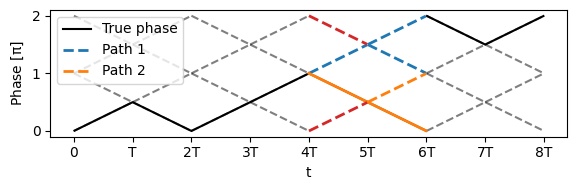

In [308]:
data = np.array([1,1,0,1,0,0])
#data = np.array([1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0])
data = np.array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0])
data = np.array([1, 0, 1, 1, 0, 0, 0, 1])
T = 0.1
fc = 1/T*1.25
#fc = 10
fs = 1000
s, t, phase = generate_msk_data(data, T, fc, fs)

fig, ax = plt.subplots(figsize=(6, 2))




for j in range(4):

    if j !=2:
        t1 = int(2*j*T*fs)
        t2 = int((2*j+1)*T*fs)
        ax.plot(t[t1:t2]/T, (np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)
        ax.plot(t[t1:t2]/T, (np.pi+np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)

        ax.plot(t[t1:t2]/T, (2*np.pi-np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)
        ax.plot(t[t1:t2]/T, (np.pi-np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)

        t1 = int((2*j+1)*T*fs)
        t2 = int((2*j+2)*T*fs)

        ax.plot(t[t1:t2]/T, (0.5*np.pi + np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)
        ax.plot(t[t1:t2]/T, (1.5*np.pi+np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)

        ax.plot(t[t1:t2]/T, (1.5*np.pi-np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)
        ax.plot(t[t1:t2]/T, (0.5*np.pi-np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='black', linestyle='--', alpha=0.5)



        



data = np.array([1, 0, 1, 1, 0, 0, 0, 1])
s, t, phase = generate_msk_data(data, T, fc, fs)
phase[phase < 1e-10] = np.nan

ax.plot(t/T, phase/np.pi, color='black', linewidth=1.5, label = 'True phase')

ax.plot(t[int(4*T*fs):int(5*T*fs)]/T, (np.pi+np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='C0', linewidth=2, label='Path 1', linestyle='--')
ax.plot(t[int(4*T*fs):int(5*T*fs)]/T, (np.pi-np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='C1', linewidth=2)

ax.plot(t[int(5*T*fs):int(6*T*fs)]/T, (1.5*np.pi+np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='C0', linewidth=2, linestyle='--')
ax.plot(t[int(5*T*fs):int(6*T*fs)]/T, (1.5*np.pi-np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='C0', linewidth=2,linestyle='--')

ax.plot(t[int(5*T*fs):int(6*T*fs)]/T, (.5*np.pi+np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='C1',linewidth=2, linestyle='--', label='Path 2')
ax.plot(t[int(5*T*fs):int(6*T*fs)]/T, (.5*np.pi-np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='C1',linewidth=2)

ax.plot(t[int(4*T*fs):int(5*T*fs)]/T, (2*np.pi-np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='C3', linewidth=2, linestyle='--')
ax.plot(t[int(4*T*fs):int(5*T*fs)]/T, (np.pi/(2*T)*t[0:int(T*fs)])/np.pi, color='C3', linewidth=2, linestyle='--')



ax.legend()

#for i in range(1, int(len(data))):
#    ax.axvline(x=i*T*10, color='black', linestyle='--')
ax.set_xlabel('t')
ax.set_ylabel('Phase [$\pi$]')
x_labels = ['0', 'T', '2T', '3T', '4T', '5T', '6T', '7T', '8T']

ax.set_xticks(np.arange(0, len(data)+1, 1))
ax.set_xticklabels(x_labels)
plt.tight_layout()

plt.savefig('figures/theory/decoder_viterbi.pdf')

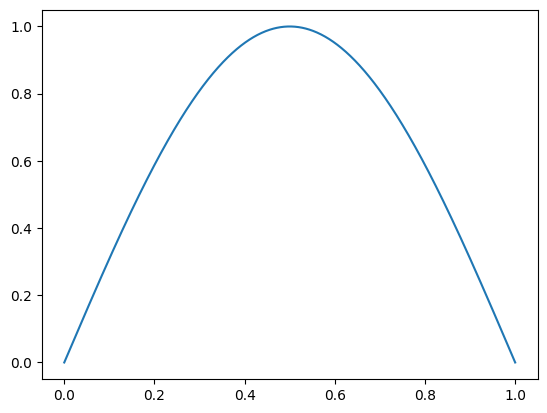

In [316]:
t = np.linspace(0, 1*np.pi, 1000)

plt.plot(t/np.pi,np.sin(t))

In [323]:
-np.cos(np.pi)

1.0

In [319]:
np.mean(np.sin(t))

0.635982628472229